#**Algorithmic Approach to Autonomous Navigation**

Project Guide : Dr. Rajalakshmi P

Shantanu Yadav,  EE20MTECH12001

###**Background**

Autonomous navigation is the critical requirement for intelligent mobile robotics. To autonomously navigate in an enviornment a autonomous vehicle must be able to **perform accurate predictions and decision making based on currently available data.**

Bayes filtering algorithms such as Kalman Filter, Particle Filter, Point Mass Filter are being used extensively to estimate an unknown state from given set of informations.[$ ^{[1]}$](https://ieeexplore.ieee.org/document/5546308)

###**How to Predict?**

At first, prediction looks to be based only on human thoughts and intution. But it turns out that some of the most fundamental mathematical concepts can actually estimate, predict or classify information by studying the observations present so far.

One of the most common techniques used is the *Least Square Criterion* for regression.

Consider the set of data given below.

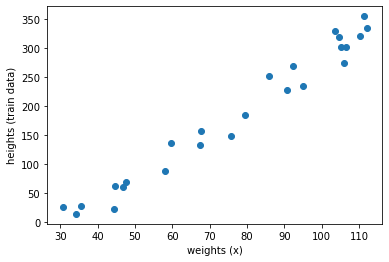

This data looks to be spread linearly between the two axis. So to estimate this data by drawing a best-fit line we use Least Squares.

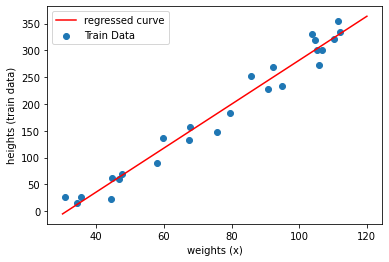

Let us start by understanding our first filter using weight analog.

###**g-h Filter : Weight Analogy**

Let us assume that we want to estimate a person's weight. We have a weight measuring device but let's assume it has some caliberation error and hence the readings from it are not accurately correct. Let us finally assume that the person's actually weight is increasing by 1 lb everyday. (Note that we are not aware of person's actual weight as the readings from the weighing machine are not accurate). 

Only following the readings from weighing machine will always give errornous information and always predicting the weight lies on human intution after observing data.

So we **predict** the weight of the person on a particular day to be some weight estimated in between the measured value and predicted value of previous day plus some gain or loss.

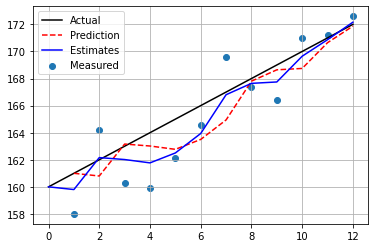

In [10]:
import numpy as np
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
#Let the weight be increased by 1lb everyday . This is actually what is happening but we have an incorrect measurment device and human physiology to predict.
actual = [160+i for i in range(0,13)]

#Assuming we somehow guessed correct gain rate !
gain_rate = 1

time_step = 1
#initial estimate at day 0 is assumed 160 lb
estimates = [160]
prediction=[]

def predict_using_gain_guess(estimated_weight):
  for z in weights:
    predicted_weight = estimated_weight + gain_rate*time_step 
    estimated_weight = predicted_weight + (4/10)*(z - predicted_weight)
    estimates.append(estimated_weight)
    prediction.append(predicted_weight)
  return estimates,prediction

estimated_weight = 160
estimates,prediction = predict_using_gain_guess(estimated_weight)

days = np.arange(0,13,1)
plt.grid()
plt.scatter(days[1:],weights,label = 'Measured')
plt.plot(days,actual,label='Actual',c='k')
plt.plot(days[1:], prediction,label='Prediction',linestyle = 'dashed',c='r')
plt.plot(days,estimates , label='Estimates',c='b')
plt.legend()

What if initial guess of weight gain is wrong !

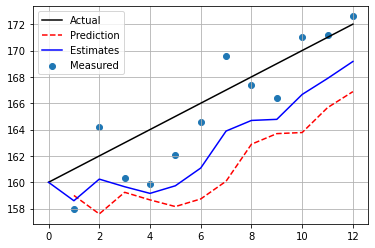

In [11]:
import numpy as np
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

#Let the weight be increased by 1lb everyday . This is actually what is happening but we have an incorrect measurment device and human physiology to predict.
actual = [160+i for i in range(0,13)]

# Incorrect guess!
gain_rate = -1
time_step = 1
#initial estimate at day 0 is assumed 160 lb
estimates = [160]
prediction=[]

def predict_using_gain_guess(estimated_weight):
  for z in weights:
    predicted_weight = estimated_weight + gain_rate*time_step 
    estimated_weight = predicted_weight + (4/10)*(z - predicted_weight)
    estimates.append(estimated_weight)
    prediction.append(predicted_weight)
  return estimates,prediction

estimated_weight = 160
estimates,prediction = predict_using_gain_guess(estimated_weight)

days = np.arange(0,13,1)
plt.grid()
plt.scatter(days[1:],weights,label = 'Measured')
plt.plot(days,actual,label='Actual',c='k')
plt.plot(days[1:], prediction,label='Prediction',linestyle = 'dashed',c='r')
plt.plot(days,estimates , label='Estimates',c='b')
plt.legend()


That is not so impressive. The estimates quickly divert from the measurements. Clearly a filter that requires us to correctly guess a rate of change is not very useful.

One of the solution to this is to estimate gain rate also each day.


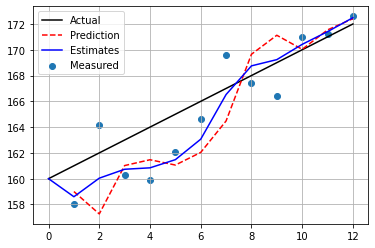

In [12]:
weight = 160
gain_rate = -1

time_step =1
weight_scale = 4/10
gain_scale = 1/3
prediction = []
estimates = [160]

for z in weights:
  #prediction step
  weight = weight + gain_rate*time_step
  prediction.append(weight)

  #estimation step
  residual = z - weight
  weight =  weight + weight_scale*residual
  gain_rate = gain_rate + gain_scale*residual
  estimates.append(weight)


plt.grid()
plt.scatter(days[1:],weights,label = 'Measured')
plt.plot(days,actual,label='Actual',c='k')
plt.plot(days[1:], prediction,label='Prediction',linestyle = 'dashed',c='r')
plt.plot(days,estimates , label='Estimates',c='b')
plt.legend()

I think this is starting to look really good. Because of the poor initial guess of the weight gain being -1 it takes the filter several days to accurately predict the weight, but once it does that it starts to accurately track the weight. 


##The g-h Filter

The algorithm of predicting and estimating values is the g-h Filter algorithm. $g$ is the scaling for measurement and $h$ is the scaling of change in measurement. 


This filter is the basis for a huge number of filter, inclluding some of the most efficient filters such as Kalman filter, Least-Square filter, Benedict-Bordner filter etc. Each filter has only different ways of assigning values to $g$ and $h$.

**Formal terminology**

The *system* is the object which we want to estimate. For example in the above problem *weights* is considered to be the *system*.

The *state* of the system is the current configuration or values of that system that is of interest to us. For example in the above problem *actual* weights is the *state* of the system.

The *measurement* is a measured value of the system. Measurements can be different from the values of state beacause of errors.

*Process model* is the mathematical model of the system. In the above problem the process model is $weight^{i+1} = weight^{i} + gain rate * time step $

The predict step of the system is known as the *system propogation*. The update step is known as the *measurement update*.





#### The g-h Filter Algorithm




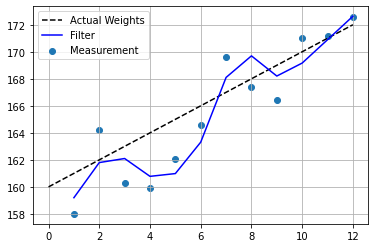

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def g_h_filter(data , xo , dx , g , h , dt = 1):
  x_est = xo
  results = []
  for z in data:
    #prediction
    x_pred = x_est + dx*dt
    dx = dx

    #update
    residual = z - x_pred
    x_est = x_pred + g*residual
    dx = dx + h*residual / dt

    results.append(x_est)
  return np.array(results)

predict = g_h_filter(weights , 160 , 1 , 6/10 , 2/3 , 1)
days = np.arange(0,13,1)
plt.grid()
plt.plot(days,actual,label = 'Actual Weights',c='k',linestyle = 'dashed')
plt.scatter(days[1:],weights,label='Measurement')
plt.plot(days[1:],predict,label = 'Filter',c='b')
plt.legend()

**Choice of g and h**

Let us consider a bot made as a part of TiHan project. Let us assume that this bot is equipped with 3 sensors. The first sensor is used for finding the bot's position, the second sensor is used for calculating the bot's velocity and finally the third sensor will be used to calculate the the bot's acceleration. 

Let $\mathbf{x}$ denote the state of our TiHan bot. So, 
$$\mathbf{x}=\begin{pmatrix}x \\ \dot{x} \\ \ddot{x} \end{pmatrix}$$
where, 

$x$ is the position of the bot,

$\dot{x}$ is the velocity of the bot and

$\ddot{x}$ is the acceleration of the bot.

Let the position of the bot at the $k^{th}$ time instant be 
$$x^k = x^{k-1}+k\dot{x}^{k-1}+k^2\ddot{x}^{k-1}$$

Let us apply g-h filter to estimate the TiHan bot's position.

We will assume that the initial position of the bot is $10 m$  (single dimension), velocity  to be $0 m/sec$ and acceleration to be $9.8 m/sec^2$ i.e $$\mathbf{x^o}=\begin{pmatrix} 10 \\ 0 \\9.8\end{pmatrix}$$

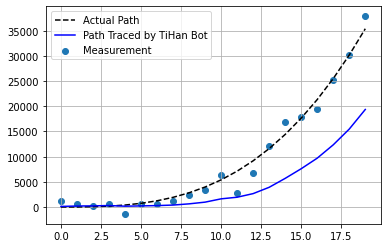

In [27]:
#Generate data
def generate_data(xo , dx , ddx , count , noise_factor ):
  data = []
  for i in range(count):
    data.append(xo + i*dx + (i**2)*ddx + np.random.randn()*noise_factor)
    dx = dx+i*ddx #update velociy
  return data

# First let us find the actual path which is to be traced by the bot
actual = generate_data(xo =10 , dx = 0 , ddx = 9.8 , count = 20 , noise_factor = 0)
measured = generate_data(xo =10 , dx = 0 , ddx = 9.8 , count = 20 , noise_factor = 2000)
predict = g_h_filter(data = measured , xo =10 , dx = 0, g=0.1 , h=0.02)

time = np.arange(0,20,1)
plt.grid()
plt.plot(time,actual,label = 'Actual Path',c='k',linestyle = 'dashed')
plt.scatter(time,measured,label='Measurement')
plt.plot(time,predict,label = 'Path Traced by TiHan Bot',c='b')
plt.legend()

We see that predicted values actually lag the actual path (which is unknown to us). this is because velocity of the bot is not updated quickly or in other words the acceleration seems to be less. 


In [ ]:
# Code to resolve acceleration here

What happens if the sensors receive to much of noise? Does g-h algorithm work?

In [ ]:
# Increased noise code here

#**Bayesian Filters**

Matlab video demo

As the name suggests, Bayesian Filters are modelled according to the *Bayes theorem of probability*. These filters consider the past information (prior) of the state before incorporating the measurements. After the information from the measurements is received the *belief* of the state or in other words the *posterior* of the state gets updated according to the *Bayes Theorem*.

Bayes' theorem is stated mathematically as the following equation :
$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
where 

$P(A)$ and $P(B)$ are the prior probabilities

$P(B|A)$ is the conditional probability, the probability of event $B$ occuring given that $A$ is true. It is also interpreted as the *likelihood* of $A$ given a fixed $B$

$P(A|B)$ is the conditional probability, the probability of event $A$ occuring given that $B$ is true. It is also interpreted as the *posterior probability* of $A$ given $B$.



###**TiHan Bot in a Room**

Suppose the TiHan Bot is now placed in room with n doors. It is now equipped with a radar sensor which sends a signal and differentiates whether the object is a **door** or a **wall**. 

Our navigation system at the beginning does not have any information where the bot can be. So our belief at this point can be defined as an NumPy array as :


Prior distribution =  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


(0.0, 1.0)

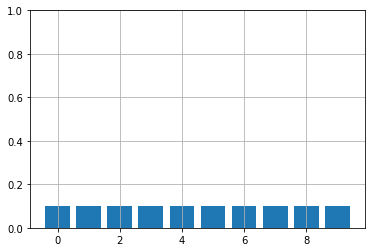

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Let number of postions (doors + walls) be equal to n
n = 10
belief = np.array([1/n]*n)
print('Prior distribution = ',belief)
plt.grid()
plt.bar(np.arange(0,n),belief)
plt.ylim((0,1))

If the intial information of the sensor received is **door**. And let the doors be located at position 2,5,9 (known to WiNet team in priori). Then we can update our belief as:


Posterior distribution =  [0.         0.         0.33333333 0.         0.         0.33333333
 0.         0.         0.         0.33333333]


(0.0, 1.0)

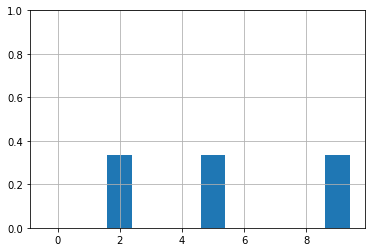

In [ ]:
doors = np.array([0,0,1,0,0,1,0,0,0,1])
belief = belief*doors
#Sum of probabilities should be 1
normalization_factor = sum(belief)
belief = belief/normalization_factor
print('Posterior distribution = ',belief)
plt.grid()
plt.bar(np.arange(0,n),belief)
plt.ylim((0,1))


This shows that our belief on where the bot is located grows stronger after receiving the information. Now suppose  the sensor readings are :
* movement towards right
* movement towards right
* door

Posterior distribution =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


(0.0, 1.5)

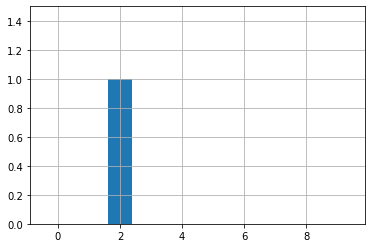

In [ ]:
door_arrangement = {0 : "0010010001" ,
                    1 : "010010001",
                    2 : "10010001",
                    3 : "0010001",
                    4 : "010001",
                    5 : "10001",
                    6 : "0001",
                    7 : "001",
                    8 : "01",
                    9 : "1"}
# zero will be denoted as a movement and 1 as a door
# since we know that bot is currently at a door then next information is 'movement' followed by 'door' and so we have to look for [1,0,0,1]                
information = "001"
possible_pos = []
update = False
for i in range(len(door_arrangement)):
  if door_arrangement[i][0] == "1":
    if door_arrangement[i].find(door_arrangement[i][0]+information) == 0 :
      update = True
  if update:
    possible_pos.append(1)
  else :
    possible_pos.append(0)
  update = False


belief = belief*possible_pos
#Sum of probabilities should be 1
normalization_factor = sum(belief)
belief = belief/normalization_factor
print('Posterior distribution = ',belief)

plt.grid()
plt.bar(np.arange(0,n),belief)
plt.ylim((0,1.5))


We have correctly located the position of the bot at position 2 which corresponds to a *door*.

**Incorporating Movement**

Interact: 

https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [25]:
from ipywidgets import interact, IntSlider
import numpy as np
import matplotlib.pyplot as plt

belief = np.array([.35, .1, .2, .3, 0, 0, 0, 0, 0, .05])
perfect_beliefs = []
no_moves = 20

def perfect_predict(belief,move):
  n = len(belief)
  result = np.zeros(n)
  for i in range(n):
    result[i] = belief[(i-move)%n]
  return result

for _ in range(no_moves):
  perfect_beliefs.append(belief)
  belief = perfect_predict(belief,1)

def simulate(time_step):
  x = np.arange(0,len(belief))  
  plt.bar(x,perfect_beliefs[time_step])
  plt.grid()
  plt.ylim((0,1))
  plt.xlabel('Room Position')
    


interact(simulate,time_step = IntSlider(value=0,max = no_moves-1))

interactive(children=(IntSlider(value=0, description='time_step', max=19), Output()), _dom_classes=('widget-in…

<function __main__.simulate>

**References**

* [1] Sebastian Thrun, "Artificial Intelligence for Robotics"

  https://classroom.udacity.com/courses/cs373

* [2] "Learning Nonlinear State-Space Models Using SmoothParticle-Filter-Based Likelihood Approximations" Andreas Svensson, Fredrik Lindsten, and Thomas B. Schön Department of Information Technology, Uppsala University

   https://arxiv.org/pdf/1711.10765.pdf

* [3] Bayes' theorem

    https://en.wikipedia.org/wiki/Bayes%27_theorem